In [1]:
import polars as pl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest

sns.set_theme()

In [2]:
X = pl.scan_csv("../data/raw/train_data.data", null_values="?").collect()

In [3]:
y = pl.read_csv("../data/raw/train_gt.csv")
y.head()

,5408
i64,str
0,"""inactive"""
1,"""inactive"""
2,"""inactive"""
3,"""inactive"""
4,"""inactive"""


In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,5372,5373,5374,5375,5376,5377,5378,5379,5380,5381,5382,5383,5384,5385,5386,5387,5388,5389,5390,5391,5392,5393,5394,5395,5396,5397,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407,5409
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.0,-0.015,-0.03,-0.05,-0.031,-0.036,-0.093,-0.008,-0.03,-0.023,-0.036,-0.042,-0.038,-0.036,-0.088,-0.102,-0.021,-0.031,-0.053,-0.257,-0.114,-0.075,-0.037,0.08,0.027,-0.161,0.056,-0.004,…,0.028,-0.035,-0.004,0.011,0.026,-0.087,-0.034,-0.048,-0.015,0.027,-0.07,-0.086,-0.027,-0.013,-0.001,0.035,-0.033,0.009,0.046,0.033,0.037,0.006,0.012,-0.032,-0.025,-0.015,-0.015,0.006,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,null
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.0,-0.002,-0.007,-0.01,-0.009,-0.017,-0.024,0.002,0.003,-0.011,-0.013,-0.01,-0.019,-0.017,-0.023,-0.044,-0.004,-0.019,-0.033,-0.187,-0.074,-0.057,-0.044,0.044,0.006,-0.146,0.009,-0.017,…,0.028,0.021,0.004,-0.001,0.054,-0.035,-0.043,-0.037,-0.011,0.034,-0.078,-0.086,-0.006,-0.002,-0.007,0.011,-0.01,0.002,0.027,0.029,0.021,0.018,0.011,-0.025,-0.016,-0.008,-0.007,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,null
2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3,-0.169,-0.025,-0.01,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,-0.032,-0.043,-0.033,-0.046,-0.094,-0.017,-0.042,-0.022,-0.033,-0.039,-0.044,-0.04,-0.091,-0.132,-0.035,-0.036,-0.062,-0.258,-0.133,-0.097,-0.07,0.069,0.014,-0.177,0.053,-0.006,…,0.029,-0.04,-0.013,-0.009,0.023,-0.076,-0.038,-0.039,-0.022,0.033,-0.077,-0.087,-0.024,-0.021,-0.005,0.036,-0.027,0.019,0.048,0.04,0.051,0.0,0.015,-0.039,-0.025,-0.029,-0.016,0.019,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,null
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.02,-0.019,-0.044,-0.097,-0.052,-0.079,-0.175,-0.04,-0.084,-0.03,-0.047,-0.058,-0.067,-0.063,-0.148,-0.228,-1.008,-0.058,-0.094,-0.315,-0.204,-0.156,-0.122,0.081,0.007,-0.204,0.084,0.003,…,0.056,-0.089,-0.026,-0.016,0.022,-0.124,-0.034,-0.035,-0.041,0.05,-0.078,-0.084,-0.031,-0.041,0.005,0.059,-0.044,0.04,0.07,0.054,0.088,-0.011,0.02,-0.058,-0.047,-0.057,-0.028,0.051,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,null


In [5]:
X.write_parquet("../data/processed/train.parquet")

In [19]:
X = pd.read_csv("../data/raw/train_data.data", na_values="?", index_col=0)

In [21]:
X.to_parquet("../data/processed/train.parquet")

In [20]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5399,5400,5401,5402,5403,5404,5405,5406,5407,5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.006,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,NaN
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.019,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,NaN
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.051,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,NaN


In [46]:
X = pd.read_parquet("../data/processed/train.parquet")

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31020 entries, 0 to 31419
Columns: 5409 entries, 0 to 5409
dtypes: float64(5409)
memory usage: 1.3 GB


In [47]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5399,5400,5401,5402,5403,5404,5405,5406,5407,5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.006,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,NaN
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.019,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,NaN
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.051,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,NaN


In [50]:
X.isna().sum(axis=0)

0         261
1         261
2         261
3         261
4         261
        ...  
5404      137
5405      137
5406      137
5407      137
5409    31020
Length: 5409, dtype: int64

In [51]:
X = X.drop(columns="5409")

In [52]:
X = X.dropna(how="all")

In [53]:
X.duplicated().sum()

5

In [54]:
X = X.drop_duplicates()

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30878 entries, 0 to 31419
Columns: 5408 entries, 0 to 5407
dtypes: float64(5408)
memory usage: 1.2 GB


In [56]:
X = X.astype("float32[pyarrow]")

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30878 entries, 0 to 31419
Columns: 5408 entries, 0 to 5407
dtypes: float[pyarrow](5408)
memory usage: 655.0 MB


In [63]:
pd.set_option("display.max_columns", None)

In [81]:
X_missing = X[X.isna().any(axis=1)]

X_missing.head()

0     1     2     3     4     5     6     7     8     9    10    11  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
189  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
191  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
192  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

       12    13    14    15    16    17    18    19    20    21    22    23  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
189  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
191  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
192  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

       24    25    26    27    28    29    30    31    32    33    34    35  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
189  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
191  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
192  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

       36    37    38    39    40    41    42    43    44    45    46    47  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
189  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
191  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
192  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

       48    49    50    51    52    53    54    55    56    57    58    59  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
189  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
191  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
192  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

       60    61    62    63    64    65    66    67    68    69    70    71  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
189  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
191  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
192  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

       72    73    74    75    76    77    78    79    80    81    82    83  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
189  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
191  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
192  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

       84    85    86    87    88    89    90    91    92    93    94    95  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
189  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
191  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
192  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

       96    97    98    99   100   101   102   103   104   105   106   107  \
16   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA

it seems that the missing values are occuring for the first feature group 0 - 4825, which are the 2D electrostatic surfaced based features.

In [111]:
total_nans = X.isna().sum().sum()

In [112]:
assert total_nans == X.loc[X_missing.index, "0":"4825"].isna().sum(axis=0).sum()

In [114]:
X.loc[X_missing.index, "4826":].isna().sum().any()

False

In [115]:
X["has_missing"] = X.isna().any(axis=1)

In [148]:
X_no_missing = X.dropna(how="any")

In [209]:
for col in X_no_missing.columns:
    result = kstest(X_no_missing[col], "norm")
    if result.pvalue > 0.025:
        print(f"Column {col} is not standard normally distributed")

On a 5% significance level, we can reject the null hypothesis that the features are standard normally distributed.

In [218]:
rejected = dict()
not_rejected = 0
for col in range(4826, 5407):
    result = kstest(X_missing[str(col)], X_no_missing[str(col)])
    if result.pvalue < 0.05:
        rejected[col] = result
    else:
        not_rejected += 1

In [220]:
len(rejected)

479

In [221]:
not_rejected

102

In [222]:
rejected.keys()

dict_keys([4826, 4827, 4828, 4829, 4830, 4831, 4832, 4833, 4834, 4836, 4837, 4838, 4840, 4842, 4843, 4844, 4845, 4846, 4848, 4849, 4850, 4851, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4863, 4864, 4865, 4866, 4868, 4869, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4884, 4885, 4886, 4887, 4888, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4899, 4900, 4901, 4902, 4903, 4904, 4905, 4908, 4909, 4910, 4913, 4916, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4934, 4935, 4937, 4938, 4940, 4941, 4943, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4956, 4957, 4959, 4960, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4975, 4977, 4978, 4979, 4980, 4982, 4983, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4999, 5000, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021,

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

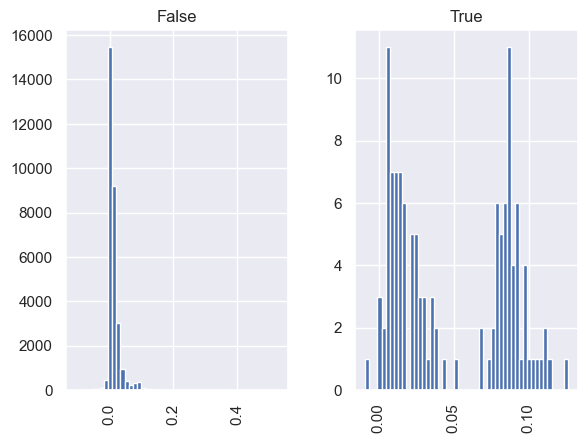

In [227]:
X.hist(by="has_missing", column="4826", bins=50)